In [6]:
# import tez
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline



In [7]:
df_train = pd.read_csv("../input/mobile-price-prediction/train_data.csv")
df_test = pd.read_csv("../input/mobile-price-prediction/test_data.csv")
df_train.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,742,0,2.2,1,4,0,56,0.2,190,...,577,1359,3557,16,11,12,0,1,1,3
1,1,1509,0,0.6,1,5,0,50,0.3,81,...,1010,1684,1540,12,8,3,1,1,0,1
2,2,641,1,1.1,0,0,1,7,0.9,192,...,417,759,3595,7,5,19,1,1,1,2
3,3,733,1,0.6,1,0,0,63,0.3,105,...,950,1739,984,17,4,9,1,0,1,0
4,4,1414,0,0.5,0,0,1,15,0.8,168,...,294,1233,1069,18,6,14,1,0,0,0


Data Visualization

In [ ]:
profile = ProfileReport(df_train, explorative=True)

#Saving results to a HTML file
profile.to_file("output.html")

<AxesSubplot:>

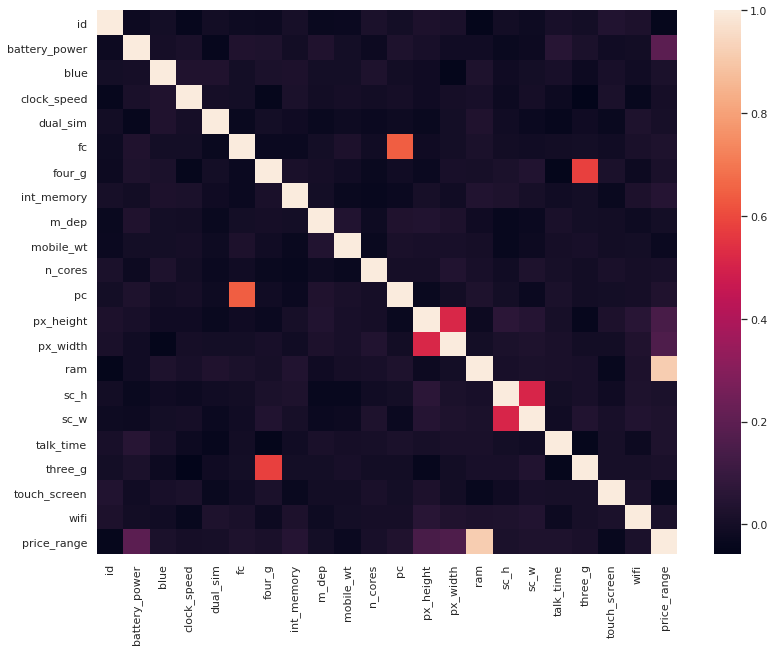

In [8]:
# correalion map
sns.set(rc={'figure.figsize':(13, 10)})
sns.heatmap(df_train.corr())

<AxesSubplot:xlabel='price_range', ylabel='ram'>

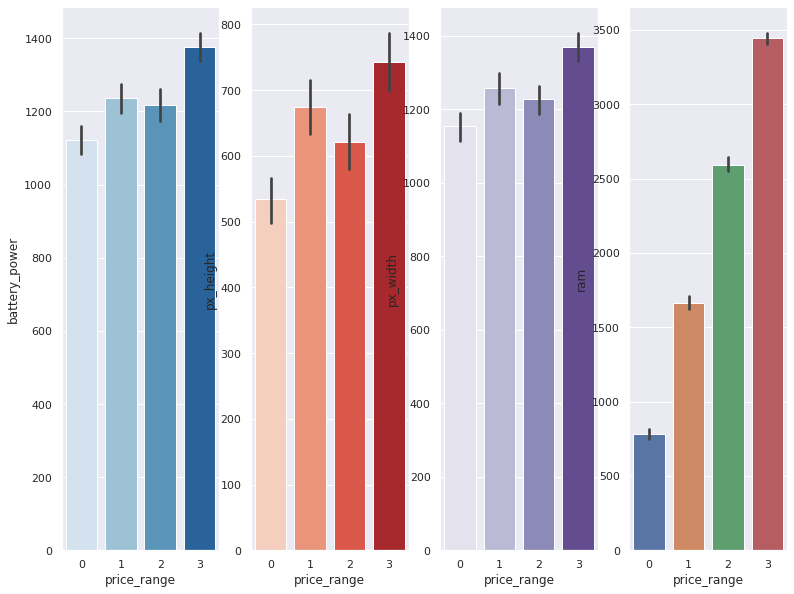

In [9]:
# plotting relation betweens price range and battery power
fig, axs = plt.subplots(ncols=4)
sns.barplot(x = "price_range", y = "battery_power", data = df_train, ax = axs[0], palette = "Blues")
sns.barplot(x = "price_range", y = "px_height", data = df_train, ax = axs[1], palette = "Reds")
sns.barplot(x = "price_range", y = "px_width", data = df_train, ax = axs[2], palette = "Purples")
sns.barplot(x = "price_range", y = "ram", data = df_train, ax = axs[3])


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='four_g', ylabel='count'>

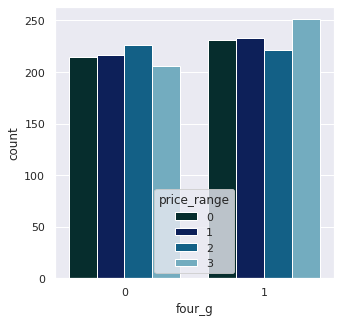

In [10]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(df_train["four_g"], hue = df_train["price_range"], palette = "ocean")

Data preprocessing

In [11]:
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1206, 21), (594, 21), (1206,), (594,))

Linear SVM algorithm

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
def linear_svc(data, target):
    sc = StandardScaler()
    data = sc.fit_transform(data)
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(data, target)
    return [sc, svclassifier]

    


0.9511784511784511

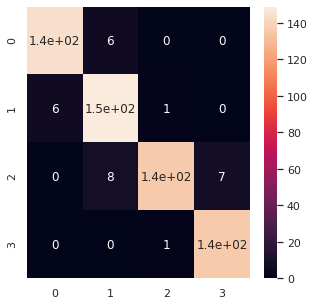

In [38]:


[scaler, svc_classifier] = linear_svc(X_train, y_train)
X_test = scaler.transform(X_test)
y_pred = svc_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
ac = accuracy_score(y_pred,y_test)
ac

In [15]:
final_test = df_test.values
final_test = sc.transform(final_test)
y_pred = svclassifier.predict(final_test)



decision tree algorithm

In [18]:
from sklearn.tree import DecisionTreeClassifier


def decision_tree_classifier(data, target):
    model1 = DecisionTreeClassifier(criterion = "gini")
    model1.fit(data,target)

    model2 = DecisionTreeClassifier(criterion = "entropy")
    model2.fit(data, target)
    
    return [model1, model2]
    
    


In [20]:
from sklearn.metrics import accuracy_score

[model_entropy, model_gini] = decision_tree_classifier(X_train, y_train)
y_pred1 = model_entropy.predict(X_test)
y_pred2 = model_entropy.predict(X_test)

ac1 = accuracy_score(y_pred1,y_test)
ac2 = accuracy_score(y_pred1,y_test)

ac1, ac2

(0.8215488215488216, 0.8215488215488216)

In [21]:
sample_submission = pd.read_csv("../input/mobile-price-prediction/submission_sample.csv")
sample_submission

,id,price_range
0,0,0
1,1,1
2,2,2
3,3,0
4,4,1
...,...,...
195,195,3
196,196,1
197,197,1
198,198,0


In [29]:
df_submission = pd.DataFrame({"id": list(range(len(y_pred))), "price_range": y_pred})

In [32]:
df_submission.to_csv("submission.csv", index = False)